In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for label encoding
from sklearn import preprocessing

# Decision tree model
from sklearn.tree import DecisionTreeClassifier

# SVM model
from sklearn.svm import SVC

# ada-boost model
from sklearn.ensemble import AdaBoostClassifier

# Grid Search (to find best hyperparameters)
from sklearn.model_selection import (GridSearchCV, 
                                     ShuffleSplit, 
                                     cross_val_score)

# for evaluation
from sklearn.metrics import (accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            plot_confusion_matrix, 
                            confusion_matrix, 
                            mean_squared_error, 
                            roc_curve)

In [7]:
df_train = pd.read_csv('df_train.data')
df_test = pd.read_csv('df_test.data')

display('train dataset', df_train, 'test dataset', df_test)

'train dataset'

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,0.200,0.267,0.267,0.400,0.400,0.533,0.600,0.333,0.000,0.533,0.400,0.400,0.333,0.600,0.333,0.533,P
1,0.267,0.600,0.333,0.467,0.267,0.333,0.467,0.400,0.333,0.600,0.533,0.667,0.133,0.533,0.267,0.600,G
2,0.333,0.600,0.333,0.400,0.133,0.267,0.467,0.600,0.133,0.467,0.333,0.733,0.267,0.533,0.133,0.733,K
3,0.200,0.333,0.333,0.467,0.333,0.600,0.667,0.200,0.067,0.533,0.400,0.467,0.200,0.667,0.533,0.400,H
4,0.267,0.467,0.267,0.333,0.267,0.467,0.533,0.333,0.600,0.467,0.467,0.600,0.067,0.600,0.467,0.533,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,0.067,0.467,0.133,0.333,0.067,0.867,0.200,0.467,0.267,0.867,0.200,0.733,0.000,0.400,0.000,0.533,J
13970,0.133,0.200,0.200,0.133,0.133,0.533,0.467,0.133,0.333,0.667,0.333,0.467,0.133,0.533,0.200,0.600,B
13971,0.200,0.067,0.267,0.200,0.200,0.533,0.400,0.400,0.267,0.467,0.467,0.533,0.467,0.400,0.133,0.467,M
13972,0.133,0.267,0.200,0.200,0.133,0.400,0.467,0.400,0.400,0.400,0.400,0.733,0.133,0.600,0.267,0.600,G


'test dataset'

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,0.231,0.467,0.357,0.333,0.133,0.533,0.400,0.467,0.533,0.400,0.333,0.643,0.067,0.500,0.400,0.733,G
1,0.231,0.400,0.357,0.267,0.333,0.533,0.400,0.333,0.133,0.467,0.400,0.500,0.467,0.571,0.200,0.600,O
2,0.231,0.467,0.286,0.467,0.200,0.467,0.400,0.533,0.333,0.333,0.400,0.500,0.200,0.500,0.333,0.600,Q
3,0.231,0.267,0.357,0.200,0.133,0.467,0.533,0.133,0.533,0.733,0.400,0.571,0.133,0.500,0.267,0.533,E
4,0.462,0.600,0.643,0.467,0.267,0.467,0.667,0.133,0.533,0.933,0.400,0.143,0.067,0.643,0.200,0.533,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,0.462,0.667,0.571,0.533,0.600,0.467,0.400,0.400,0.267,0.533,0.467,0.500,0.267,0.643,0.533,0.733,F
5986,0.385,0.667,0.500,0.533,0.267,0.667,0.467,0.200,0.400,0.800,0.200,0.214,0.133,0.571,0.200,0.600,P
5987,0.077,0.000,0.143,0.000,0.000,0.467,0.467,0.200,0.667,0.533,0.400,0.500,0.000,0.500,0.400,0.533,Z
5988,0.154,0.267,0.286,0.200,0.133,0.400,0.467,0.400,0.400,0.400,0.400,0.643,0.133,0.500,0.267,0.600,G


### Create our train test input(X), real_output(Y)

In [8]:
X_train = df_train.loc[:, 'x-box':'yegvx']
Y_train = df_train[['lettr']]

X_test = df_test.loc[:, 'x-box':'yegvx']
Y_test = df_test[['lettr']]


# convert class labels to int (so can calc MSE (it only takes int not str))

le = preprocessing.LabelEncoder()
le.fit(df_train['lettr'])
# list(le.classes_)

Y_train = le.transform(df_train['lettr'])
Y_test = le.transform(df_test['lettr'])
# display(pd.concat([df_train[['lettr']], Y_train], axis=1))
# display(pd.concat([df_test[['lettr']], Y_test], axis=1))

In [9]:
### evaluation metrics setup

In [10]:
def measure_error(y_true, y_pred, average, label='empty'):
    '''
    A function to return the specified error metrics for a given label
    '''
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average=average),
                      'recall': recall_score(y_true, y_pred, average=average),
                      'f1': f1_score(y_true, y_pred, average=average),
                      'MSE': mean_squared_error(y_true, y_pred)},
#                      },
                      name=label)

def residual_scatter(y_real, y_pred):
    '''
    plot actual (real) vs predicted residual
    '''
    sns.set_context('notebook')
    sns.set_style('white')
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes()

    ph_test_predict = pd.DataFrame({'actual':y_real['lettr'],
                                    'predict': y_pred}).set_index('actual').sort_index()

    ph_test_predict.plot(marker='o', ls='', ax=ax)
    ax.set(xlabel='Actual', ylabel='Predict', xlim=(0,35), ylim=(0,35));
    
    
def confusion_matrix_plotter(model, x_input, y_output_real, labels):
    '''
    plot confusion matrix for the specified model, given input, real_output and lables
    '''
    fig, ax = plt.subplots(figsize=(30, 30))
    
    disp = plot_confusion_matrix(model, x_input, y_output_real,
                                     display_labels= labels.value_counts().sort_index().index.map(lambda x: x[0]),
                                     cmap=plt.cm.Blues,
                                     normalize='true',
                                     ax=ax)

    disp.ax_.set_title('Confusion matrix, with normalization')

    plt.show()
    
def evaluation_metrics(model):
    '''
    return a table of the specifed evaluation metrics for a multi-class problem
    '''
    df_list_error = []
    for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
        y_real = Y
        y_predict = model.predict(X)

        # create common error metrics (for multi-class classification)
        test_error = {}
        for average in ['micro', 'macro', 'weighted']:
            test_error[average] = measure_error(y_real, y_predict, average)

        df_list_error.append(pd.DataFrame(test_error))

        #plot residual
#         residual_scatter(y_real, y_predict)
        

    dtc_error_1 = pd.concat([df_list_error[0], df_list_error[1]], keys=['train set', 'test set'])
    display(dtc_error_1)

def cross_val(model, x_input, y_output_real):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    return cross_val_score(model, x_input, y_output_real, cv=cv)

### train the model

In [11]:
adb = AdaBoostClassifier()

# use cross-validation to fine tune hyperparameters
cross_score = cross_val(adb, X_train, Y_train)

print(f"{'-' * 50}\n{cross_score.mean(): 0.2f} accuracy with a standard deviation of {cross_score.std(): 0.2f}")

--------------------------------------------------
 0.24 accuracy with a standard deviation of  0.04


In [12]:
display(adb.get_params())

adb = adb.fit(X_train, Y_train)

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

micro       macro    weighted
train set accuracy     0.265708    0.265708    0.265708
          precision    0.265708    0.291555    0.293373
          recall       0.265708    0.267635    0.265708
          f1           0.265708    0.245679    0.246459
          MSE        102.920066  102.920066  102.920066
test set  accuracy     0.270618    0.270618    0.270618
          precision    0.270618    0.287349    0.289259
          recall       0.270618    0.268361    0.270618
          f1           0.270618    0.249464    0.250638
          MSE        103.072621  103.072621  103.072621

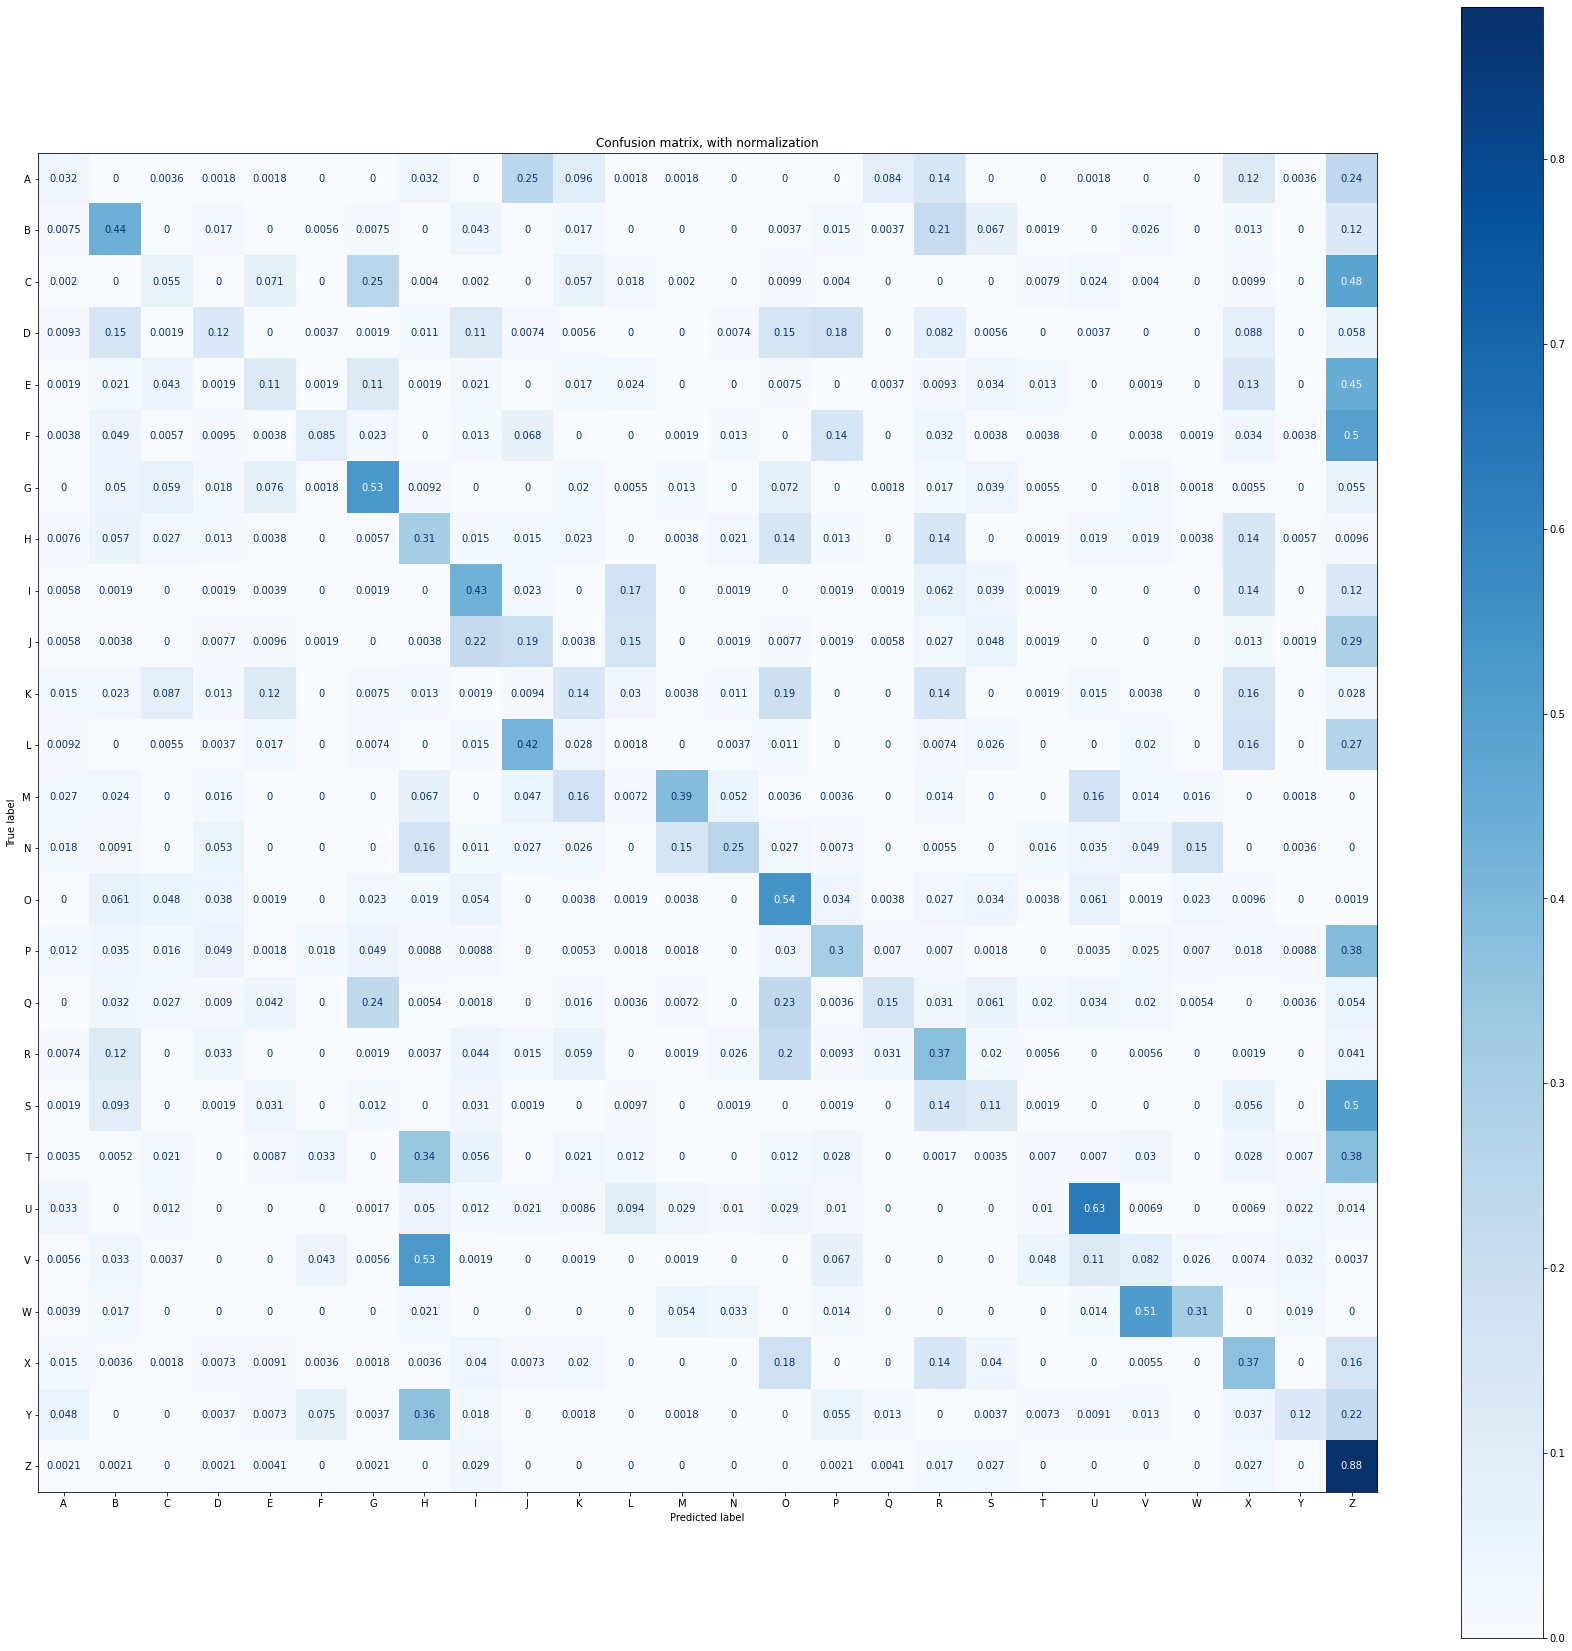

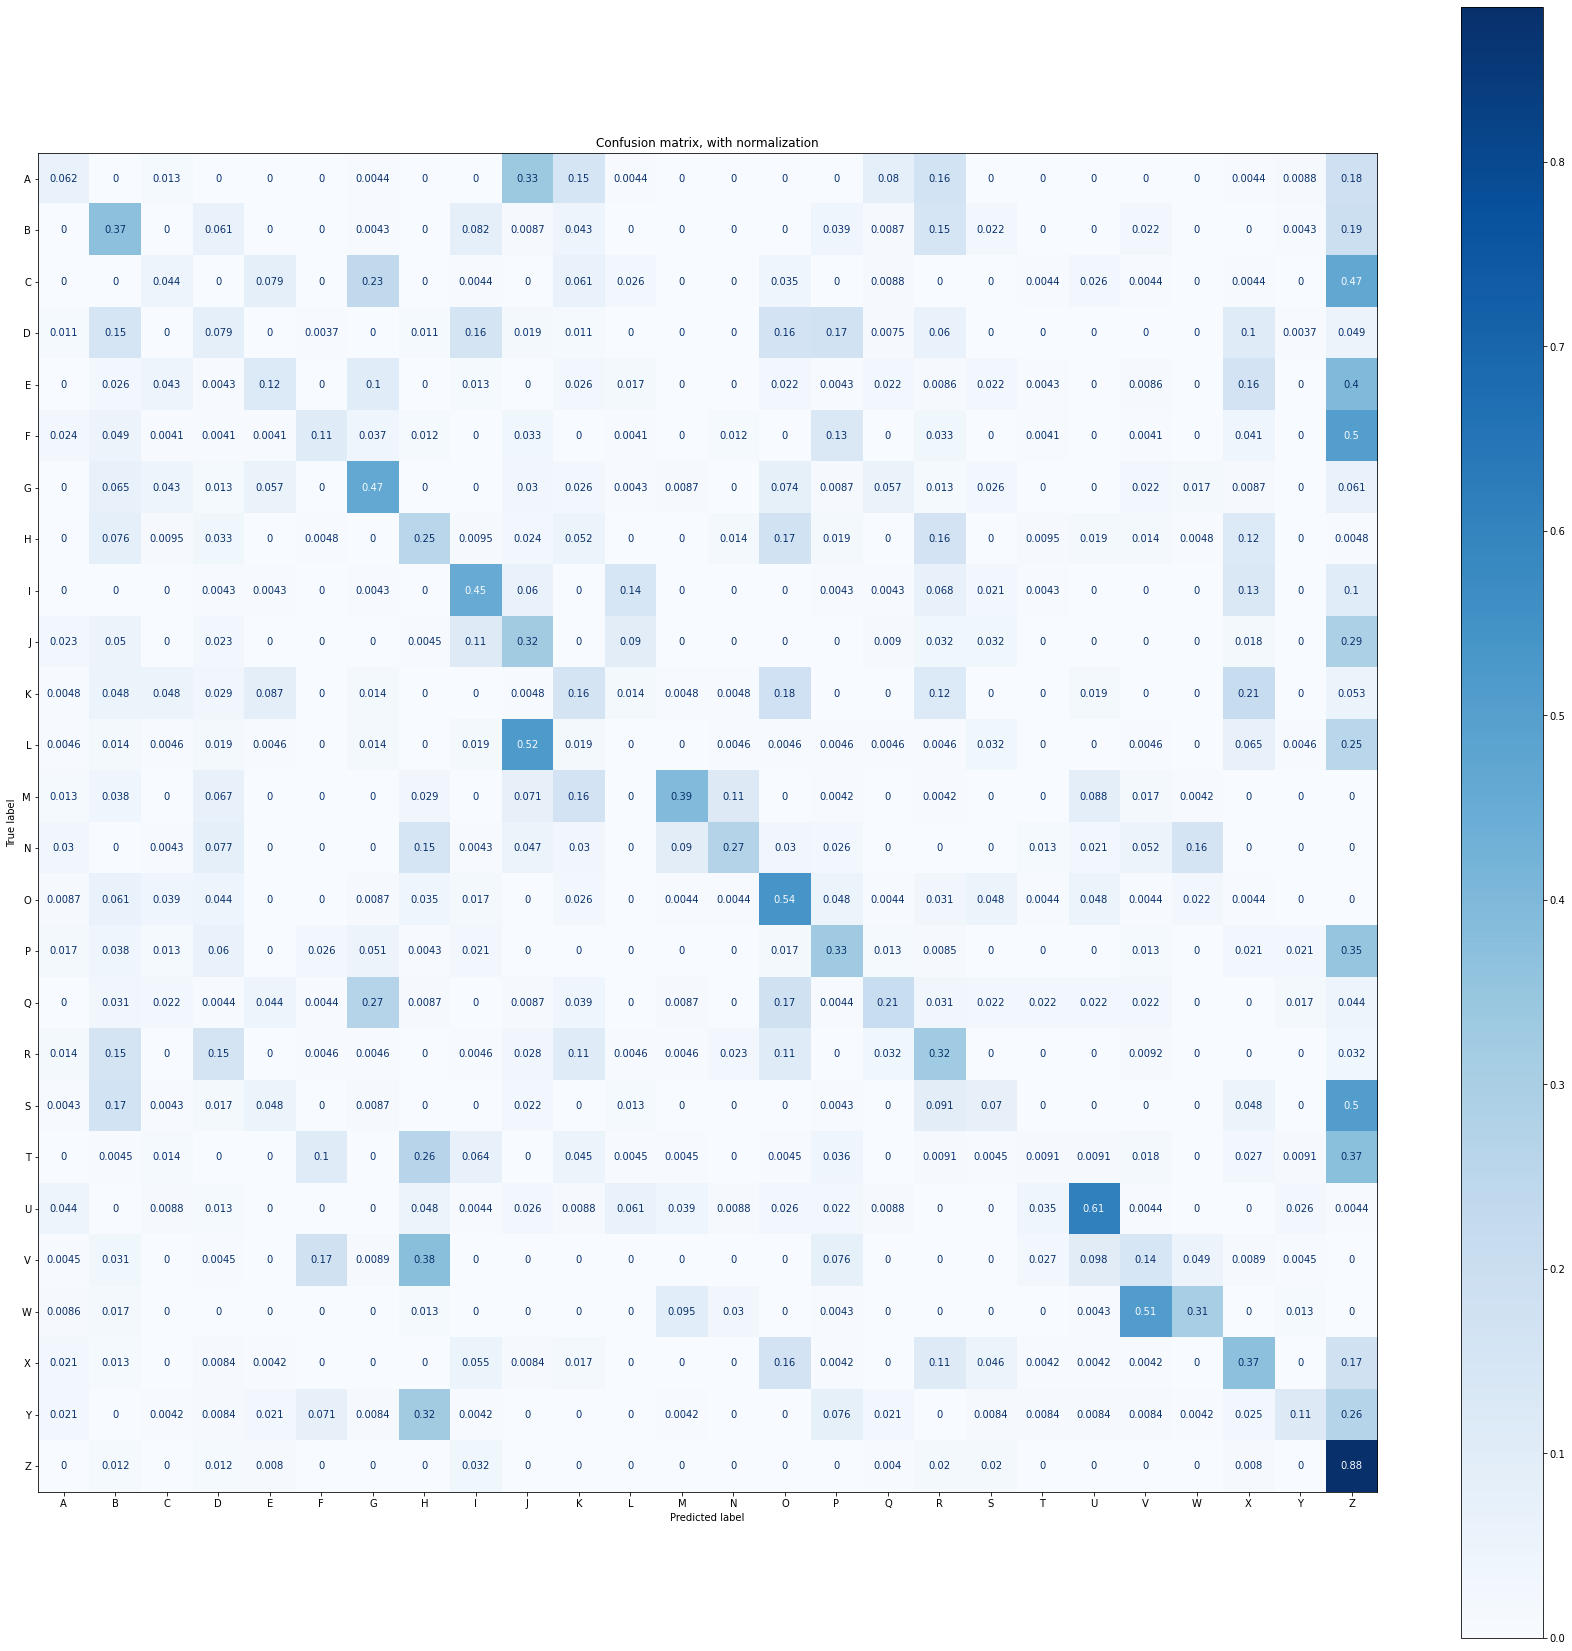

In [13]:
eval_metric = evaluation_metrics(adb)

for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
    confusion_matrix_plotter(adb, X, Y, df_test['lettr'])

    
# ROC curves are typically used in binary classification to study the output of a classifier. 
# In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. 
# One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix 
# as a binary prediction (micro-averaging).

### Using Grid Search
#### to find optimal hyper parameters

In [14]:
param_grid = {"n_estimators": [50, 200, 300],
              "learning_rate": [0.01, 0.1, 0.5, 0.1],
#               "base_estimator": [None, SVC]
             }

# instantiate a grid search
gr = GridSearchCV(AdaBoostClassifier(random_state=12),
                  param_grid=param_grid,)
#                   scoring='f1_weighted',
#                   n_jobs=-1)


# use cross-validation to fine tune hyperparameters
cross_score = cross_val(gr, X_train, Y_train)

print(f"{'-' * 50}\n{cross_score.mean(): 0.2f} accuracy with a standard deviation of {cross_score.std(): 0.2f}")

--------------------------------------------------
 0.41 accuracy with a standard deviation of  0.01


In [16]:
gr = gr.fit(X_train, Y_train)

print('Best Criterion:', *[i for i in gr.best_estimator_.get_params().items()], sep="\n")

Best Criterion:
('algorithm', 'SAMME.R')
('base_estimator', None)
('learning_rate', 0.01)
('n_estimators', 300)
('random_state', 12)


### Predict & Validate our model

c:\users\taghi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\taghi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\taghi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

micro      macro   weighted
train set accuracy    0.421139   0.421139   0.421139
          precision   0.421139   0.521292   0.523580
          recall      0.421139   0.417744   0.421139
          f1          0.421139   0.406239   0.409215
          MSE        53.347646  53.347646  53.347646
test set  accuracy    0.368447   0.368447   0.368447
          precision   0.368447   0.470491   0.470698
          recall      0.368447   0.365022   0.368447
          f1          0.368447   0.340693   0.343245
          MSE        63.550083  63.550083  63.550083

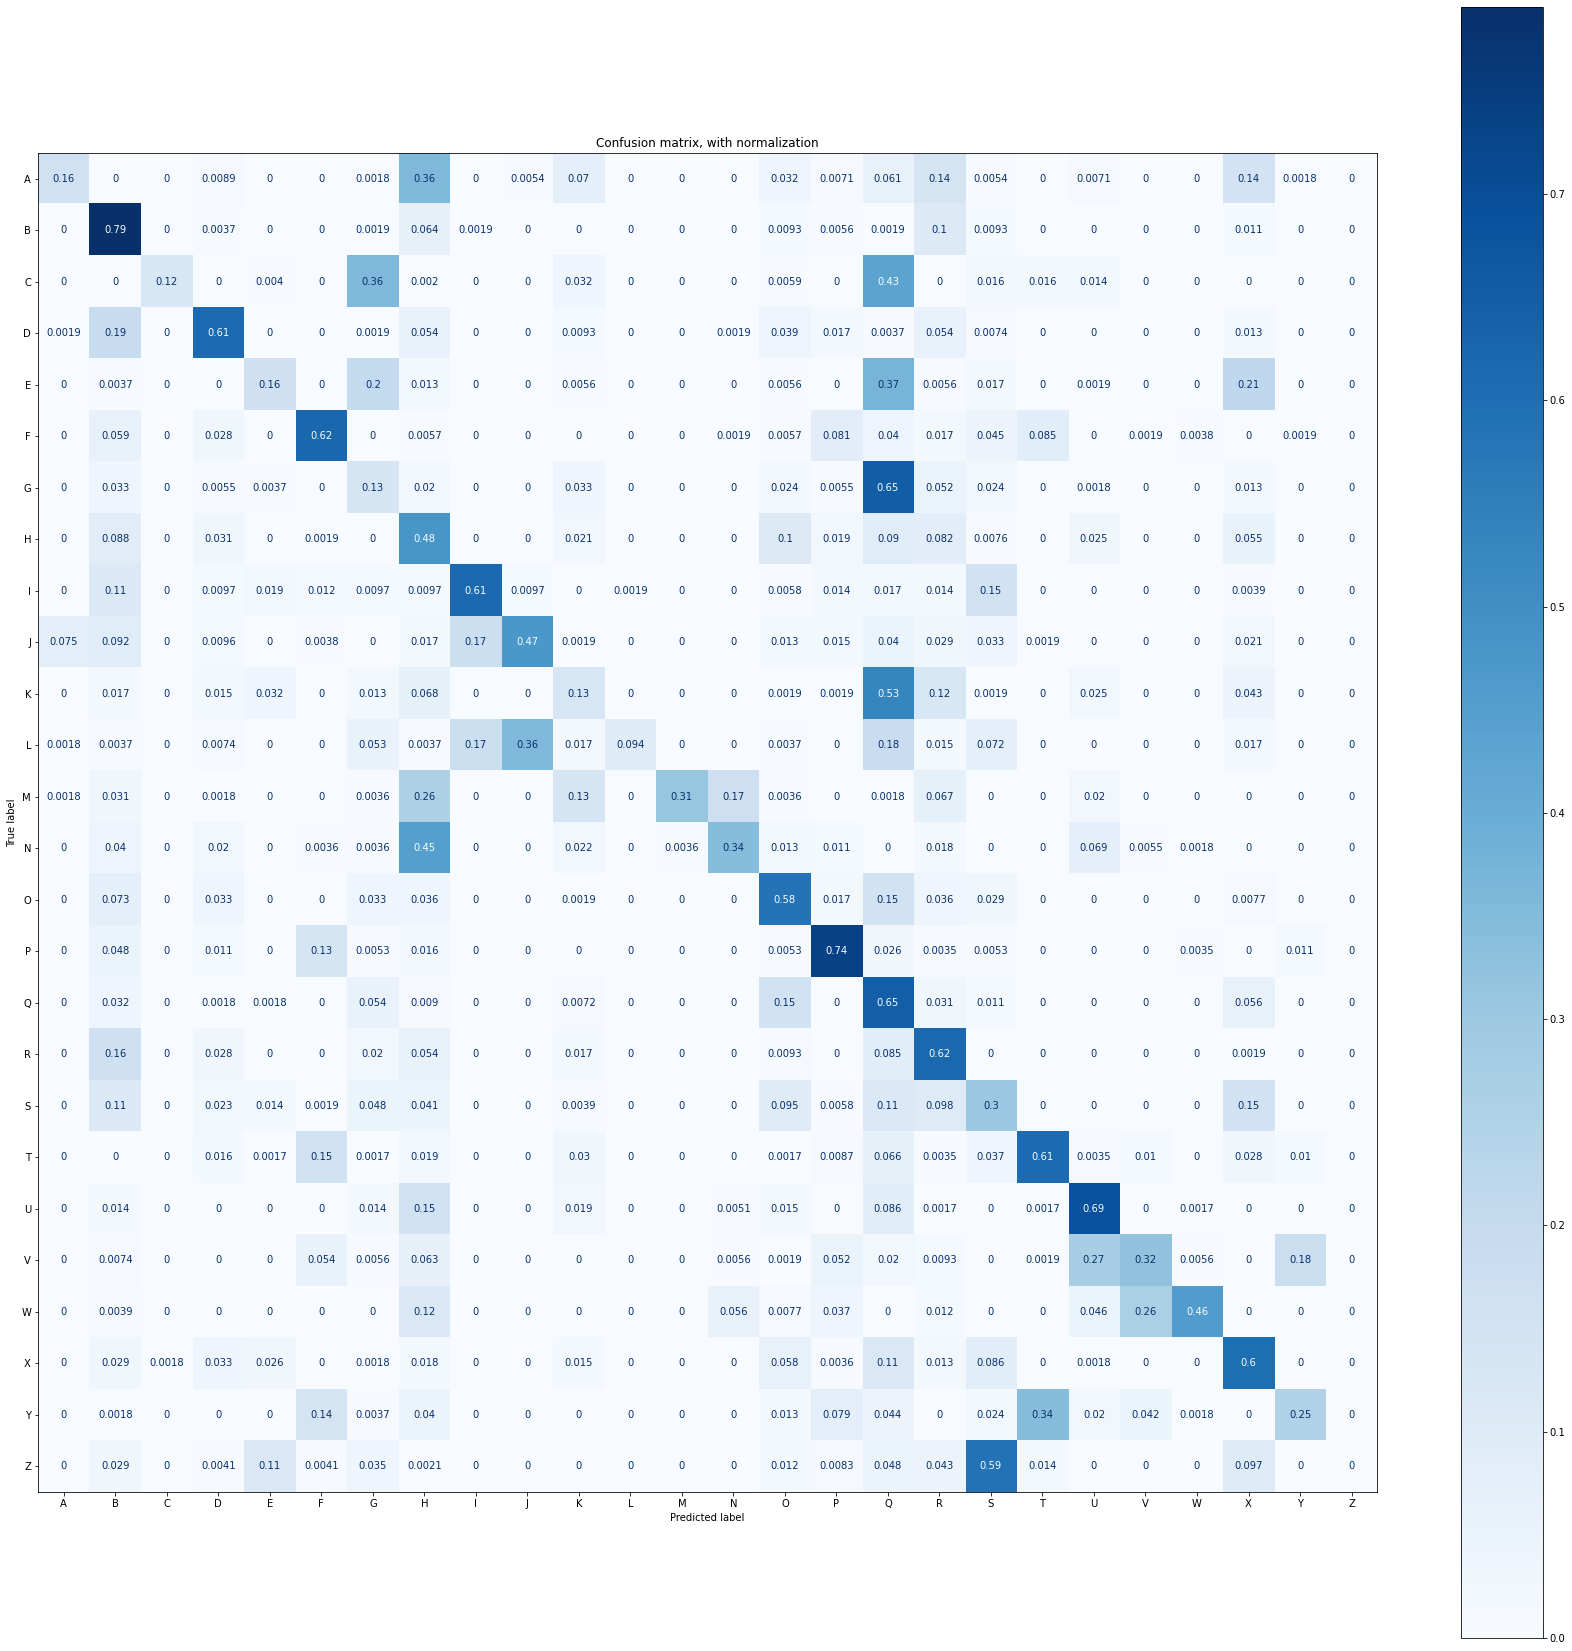

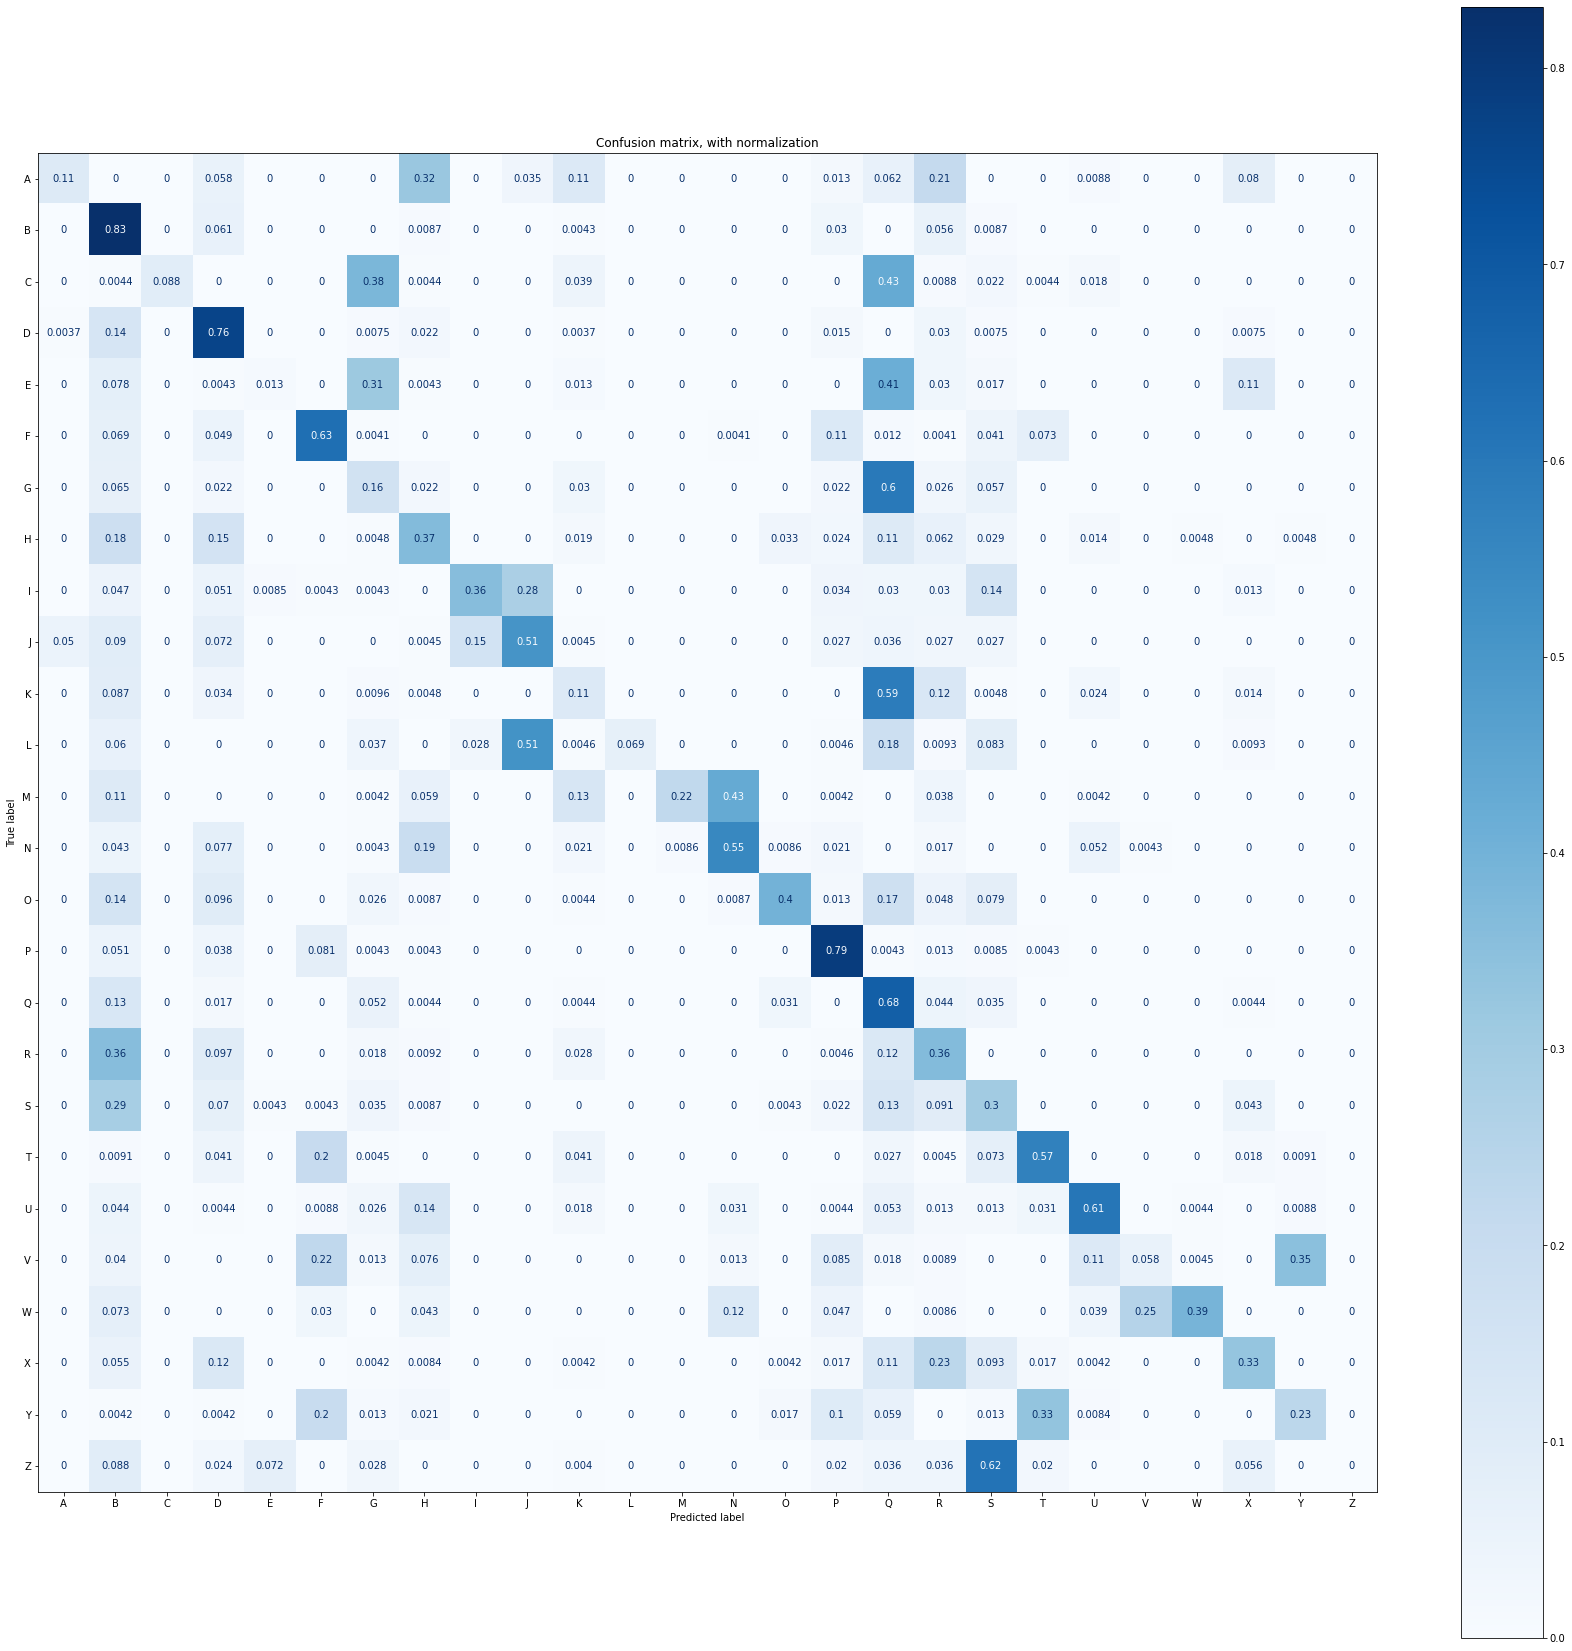

In [17]:
evaluation_metrics(gr)

for X, Y in [(X_train, Y_train), (X_test, Y_test)]:
    confusion_matrix_plotter(gr, X, Y, df_test['lettr'])
    
# AdaBoost is best used to boost the performance of decision trees on binary classification problems
# so no wonder why the results are not so good (our problem is multi-class)